## Adaline

In [1]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [2]:
repetitions = 200
x_all = reproduce_x_times(x_unipolar, repetitions)
d_all = reproduce_x_times(d_bipolar, repetitions)
x_all = x_all + get_random_except_first_row(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.04763344, -0.04783908,  0.9785622 ,  0.9502629 , -0.00727815],
        [-0.04251573,  0.97175668, -0.02547312,  0.97330652, -0.03457974]]),
 array([[-1, -1, -1,  1, -1]]))

In [3]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [4]:
x_range = np.arange(-2, 4)
experiments_numb = 100

In [5]:
perceptrons = []
for alfa in list(np.linspace(0, 0.0025, num=100))[1:]:
    p = Adaline(x_train, d_train, x_test, d_test, alfa, 0.4, (-0.1, 0.1))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

99

,mi,epoch count
0,0.000025,100.00
1,0.000051,100.00
2,0.000076,99.82
3,0.000101,78.46
4,0.000126,62.78
...,...,...
94,0.002399,100.00
95,0.002424,100.00
96,0.002449,100.00
97,0.002475,100.00


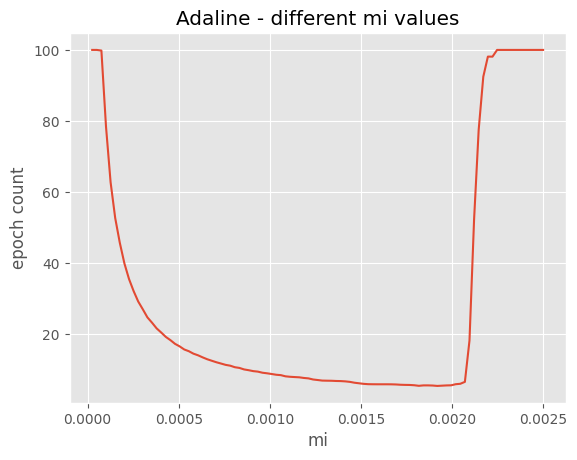

In [6]:
x, y = [x.alfa for x in perceptrons], [x.average_epoch_count for x in perceptrons]
plt.plot(x, y)
plt.title("Adaline - different mi values")
plt.xlabel("mi")
plt.ylabel("average epoch count")
pd.DataFrame({"mi":x, "average epoch count":y})